In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neural_net import NeuralNetwork
from operations import *
from sklearn.utils import shuffle

In [2]:
def load_dataset(csv_path, target_feature):
    dataset = pd.read_csv(csv_path)
    t = np.expand_dims(dataset[target_feature].to_numpy().astype(np.float64), axis=1)
    X = dataset.drop([target_feature], axis=1).to_numpy()
    return X, t

In [3]:
X, y = load_dataset("./data/wine_quality.csv", "quality")

# Split the data by K-fold with K=5
k_fold = 5
#np.random.seed(486)
trainXs = X
trainYs = y
trainXs, trainYs = shuffle(trainXs, trainYs)
size = X.shape[0] // k_fold
Train = []
Valid = []

for k in range(k_fold):
    X_train = np.concatenate((trainXs[0:k*size], trainXs[(k+1)*size:]))
    y_train = np.concatenate((trainYs[0:k*size], trainYs[(k+1)*size:]))
    X_valid = trainXs[k*size:(k+1)*size]
    y_valid = trainYs[k*size:(k+1)*size]

    Train.append((X_train, y_train))
    Valid.append((X_valid, y_valid))

In [4]:
print(X.shape)
print(Valid[2][0].shape)
print(Valid[2][1].shape)

(1599, 11)
(319, 11)
(319, 1)


In [5]:
losses = []
mean_absolute_errors = []
mean_absolute_errorss_std = []
epochs = 1000
valid_results = []

for k in range(k_fold):
    X_train = Train[k][0]
    y_train = Train[k][1]
    X_valid = Valid[k][0]
    y_valid = Valid[k][1]

    n_features = X_train.shape[1]
    net = NeuralNetwork(n_features, [16,32,64,32,1], [ReLU(), ReLU(), ReLU(), ReLU(), Identity()], MeanSquaredError(), learning_rate=0.001)

    # Train the network, use loss as output
    trained_W, epoch_losses = net.train(X_train, y_train, epochs)
    losses.append(epoch_losses)

    # Forward the validation set to get the output
    y_predict = net.forward_pass(X_valid)[1][-1]
    valid_results.append(y_predict)

    # Evaluate the network on the test set, use  mean absolute error as output
    print("Accuracy on test set: {}".format(net.evaluate(X_valid, y_valid, mean_absolute_error)))
    mean_absolute_errors.append(net.evaluate(X_valid, y_valid, mean_absolute_error))

    # Evaluate the network on the test set, calculate the standard deviation of the  mean absolute error
    mav = [net.evaluate(X_valid[i], y_valid[i], mean_absolute_error) for i in range(X_valid.shape[0])]
    STD = np.std(mav)
    mean_absolute_errorss_std.append(STD)

Accuracy on test set: 0.5734389096450379
Accuracy on test set: 0.6050666321614382
Accuracy on test set: 0.5834601767213404
Accuracy on test set: 0.5245961891205769
Accuracy on test set: 0.6050283487474151


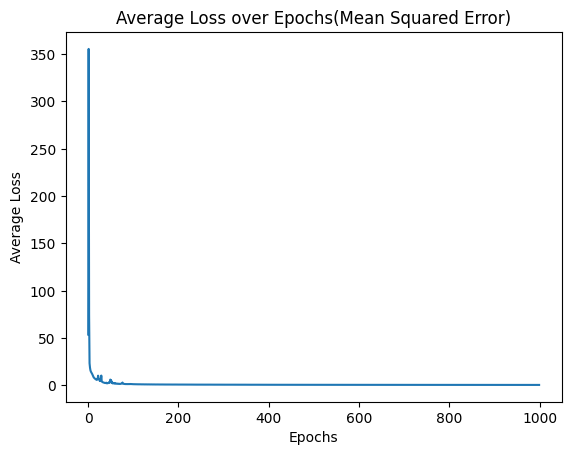

In [6]:
# Plot the average loss over epochs for all folds
avg_loss = np.mean(losses, axis=0)
plt.plot(range(epochs), avg_loss)
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Average Loss over Epochs(Mean Squared Error)")
plt.show()

In [7]:
# Print the mean_absolute_errors for each fold
for i in range(k_fold):
    print("Mean absolute error on fold {} is {}".format(i, mean_absolute_errors[i]))

Mean absolute error on fold 0 is 0.5734389096450379
Mean absolute error on fold 1 is 0.6050666321614382
Mean absolute error on fold 2 is 0.5834601767213404
Mean absolute error on fold 3 is 0.5245961891205769
Mean absolute error on fold 4 is 0.6050283487474151


In [8]:
# Calculate the total mean_absolute_errors
total_mean_absolute_errors = np.mean(mean_absolute_errors)
print("Total Mean absolute error is {}".format(total_mean_absolute_errors))

Total Mean absolute error is 0.5783180512791617


In [9]:
# Calculate the standard deviation of the 5 experiments
total_std = np.std(mean_absolute_errors)
print("Standard deviation of Mean absolute error is {}".format(total_std))

Standard deviation of Mean absolute error is 0.02954729267121844


In [10]:
# Print the standard deviation of the mean_absolute_errors for each fold
for i in range(k_fold):
    print("Standard deviation of Mean absolute error on fold {} is {}".format(i, mean_absolute_errorss_std[i]))

Standard deviation of Mean absolute error on fold 0 is 0.4409086379488619
Standard deviation of Mean absolute error on fold 1 is 0.529768488679667
Standard deviation of Mean absolute error on fold 2 is 0.4308064222754983
Standard deviation of Mean absolute error on fold 3 is 0.45887418807569663
Standard deviation of Mean absolute error on fold 4 is 0.5128049729643738


In [16]:
#print the output of fold 3
print(valid_results[2])

[[5.45017913]
 [5.2938293 ]
 [5.58036078]
 [5.5870974 ]
 [5.90393714]
 [5.69990099]
 [5.19533476]
 [5.66305117]
 [6.37412518]
 [5.8714943 ]
 [6.47831619]
 [5.97373725]
 [5.4765948 ]
 [5.26730688]
 [6.99759758]
 [5.16791831]
 [5.68608524]
 [5.89602444]
 [6.24494628]
 [6.1218078 ]
 [6.3032498 ]
 [6.35423315]
 [6.03606335]
 [5.45616152]
 [6.21722969]
 [5.48276141]
 [6.80475855]
 [5.75752057]
 [5.76527304]
 [5.1170481 ]
 [5.4175385 ]
 [5.91645282]
 [5.4036148 ]
 [5.53650097]
 [6.52951161]
 [6.07858322]
 [5.38262282]
 [5.32275587]
 [5.78004738]
 [6.55916582]
 [5.42547834]
 [5.95937068]
 [6.20919637]
 [5.68506195]
 [6.59688562]
 [5.3119777 ]
 [5.88405915]
 [5.47827224]
 [5.86148262]
 [5.50217918]
 [5.69773487]
 [5.93480657]
 [5.80310347]
 [5.05640544]
 [5.91920457]
 [5.34260193]
 [6.027898  ]
 [6.44752724]
 [5.81760897]
 [5.55666227]
 [5.72747864]
 [5.57089005]
 [6.39199217]
 [5.49555363]
 [6.03117921]
 [5.75819578]
 [5.21376327]
 [5.43706386]
 [6.22845447]
 [5.48598   ]
 [5.5698134 ]
 [5.32

In [18]:
# print the true output of fold 3
print(Valid[2][1])

[[7.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [7.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [5.]
 [4.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [4.]
 [6.]
 [7.]
 [5.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [6.]
 [4.]
 [7.]
 [6.]
 [6.]
 [4.]
 [5.]
 [6.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [7.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [7.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [6.]
 [4.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [7.]
 [8.]
 [5.]
 [6.]
 [7.]
 [6.]
 [6.]
 [6.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [7.]
 [6.]
 [6.]
 [4.]
 [8.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [4.]
 [5.]
 [4.]
 [5.]
 [5.]
 [7.]
 [5.]
 [6.]
 [6.]
 [6.]
 [4.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [7.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]
 [5.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [5.]
 [7.]
 [6.